In [2]:
# step 1 : Import the libraries
import pandas as pd
import numpy as np
import scipy
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# step 2 : Load the dataset
df = pd.read_csv(r'C:\Users\Family\DS_PRACTICE\EDA\data\diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# step 3 : statistical analysis
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

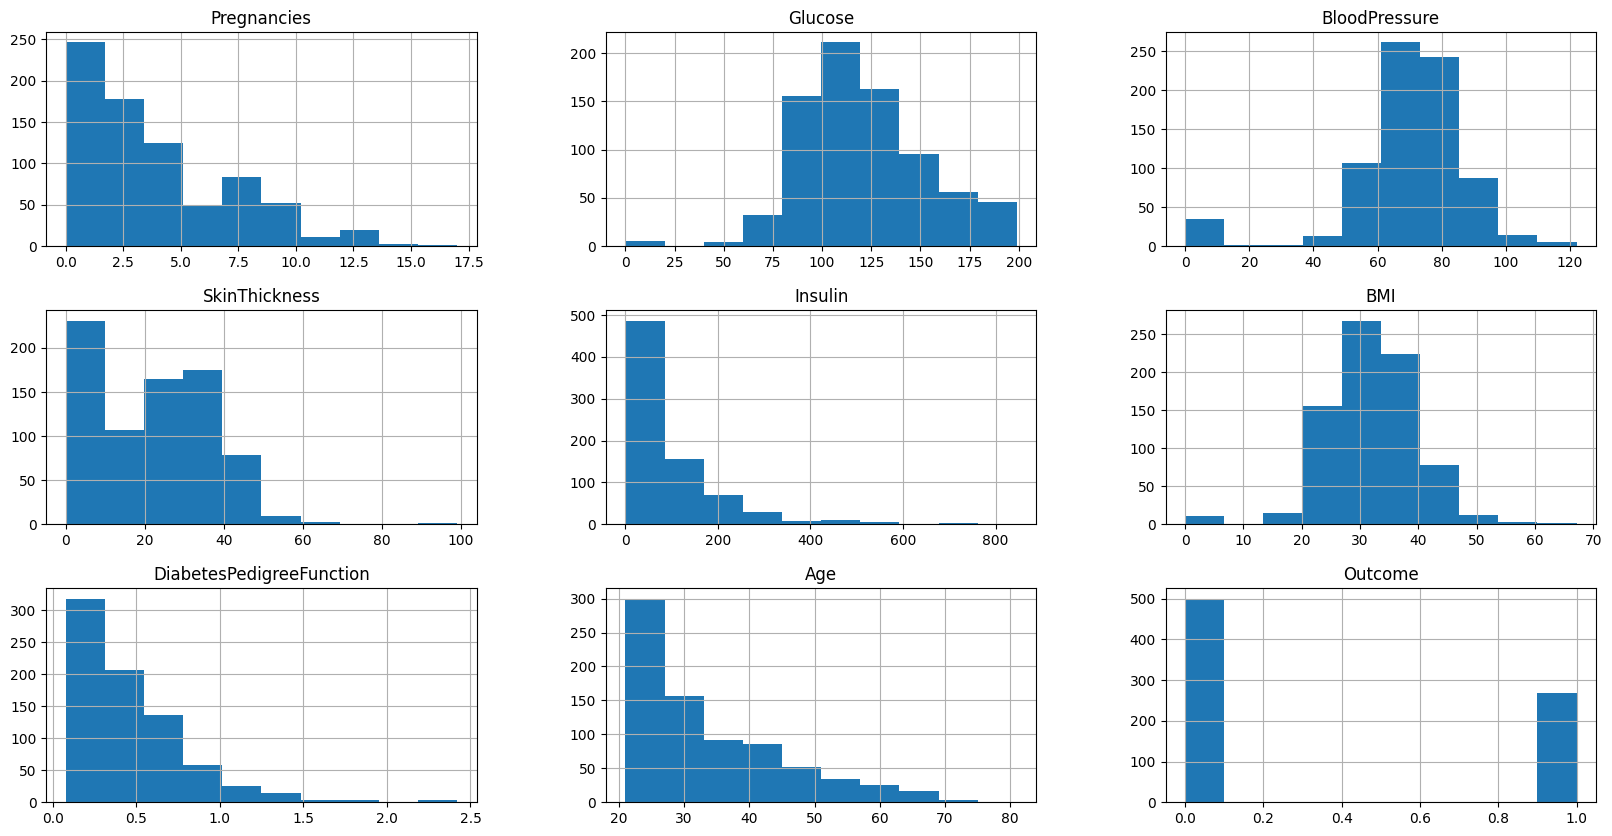

In [10]:
# step 4 : visualize data for insights
df.hist( figsize=(20,10))

In [11]:
# check the columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

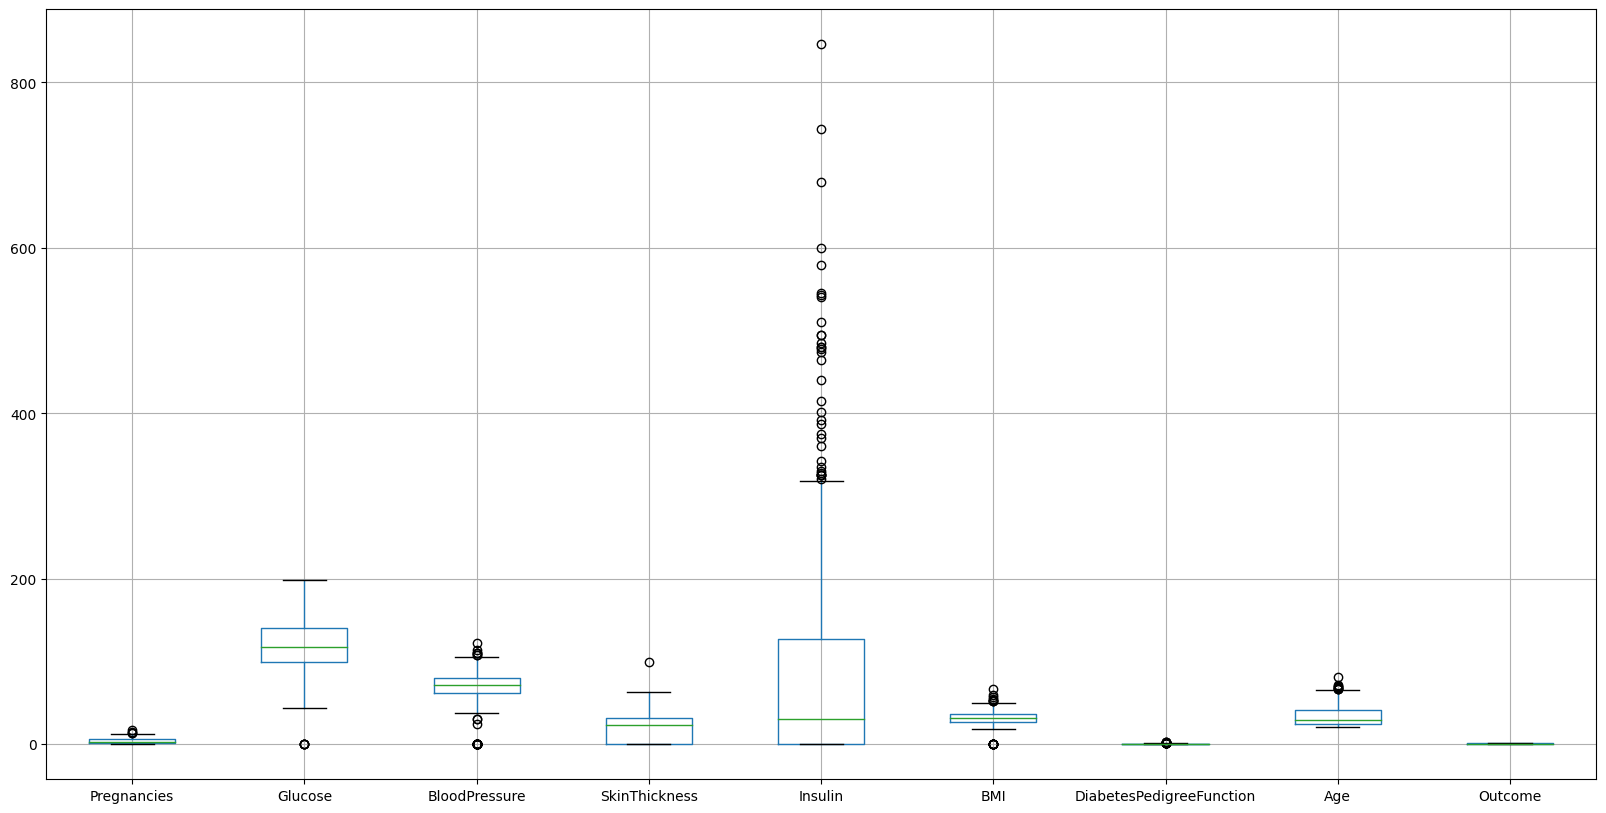

In [14]:
# step 4 : check the outliers
df.boxplot(figsize=(20,10))

In [23]:
# method to remove outliers
def remove_outliers(df, column, multiplier=1.5):
    q1, q3 = np.percentile(df[column], [25,75])
    iqr = q3 - q1
    lower_bound = q1 - (multiplier*iqr)
    upper_bound = q3 + (multiplier*iqr)

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

columns=[col for col in df.columns if col!='BloodPressure']
multipliers = {'BloodPressure': 0.75}

clean_data = df.copy()
for col in columns:
    multiplier = multipliers.get(col, 1.5)
    clean_data = remove_outliers(clean_data, col, multiplier)

<Axes: >

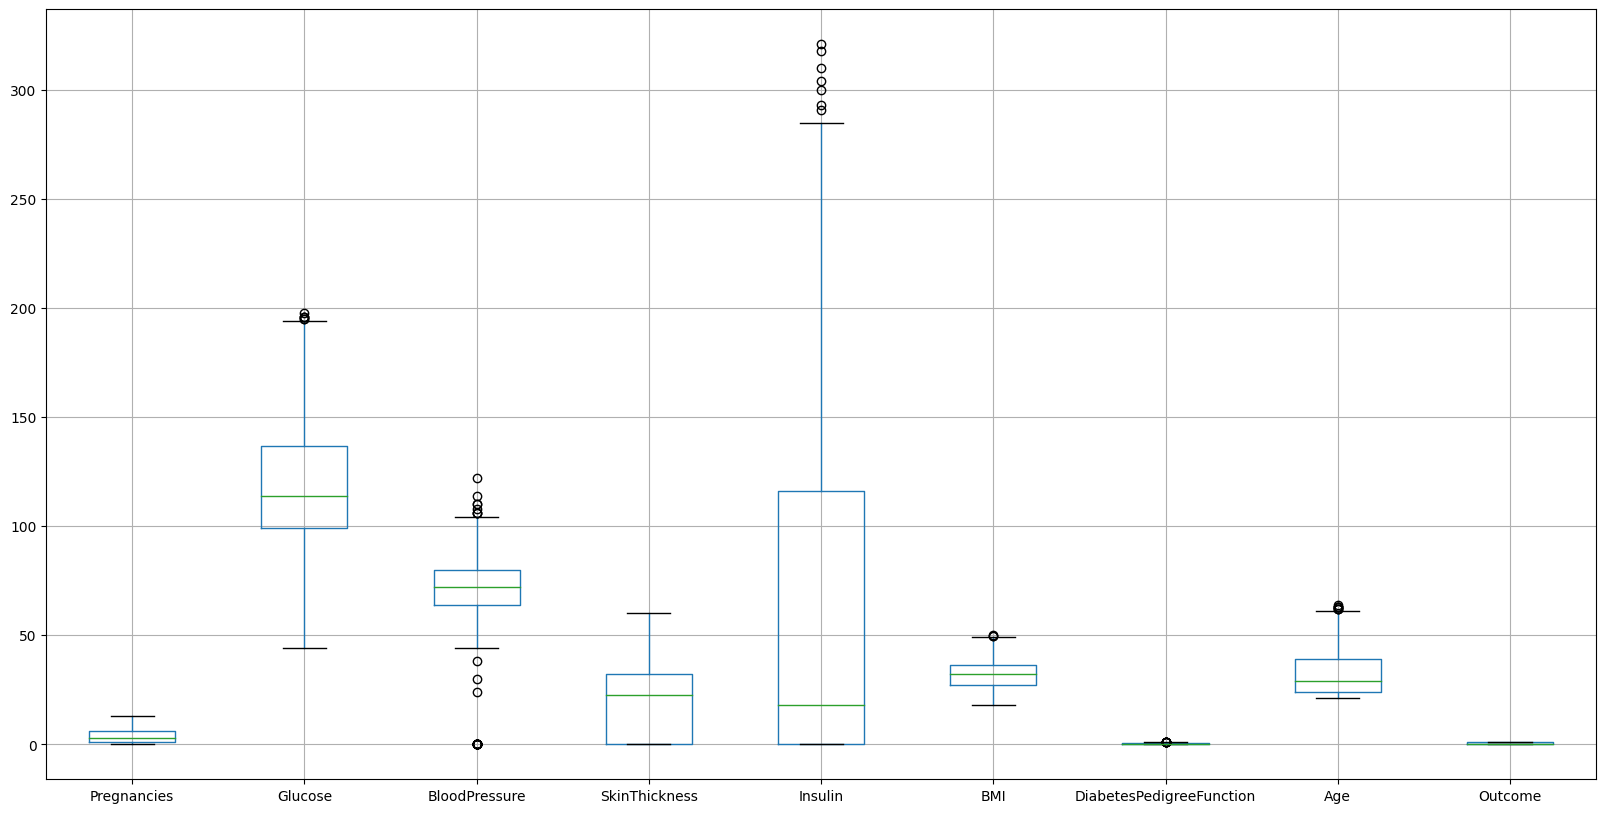

In [24]:
clean_data.boxplot(figsize=(20,10))

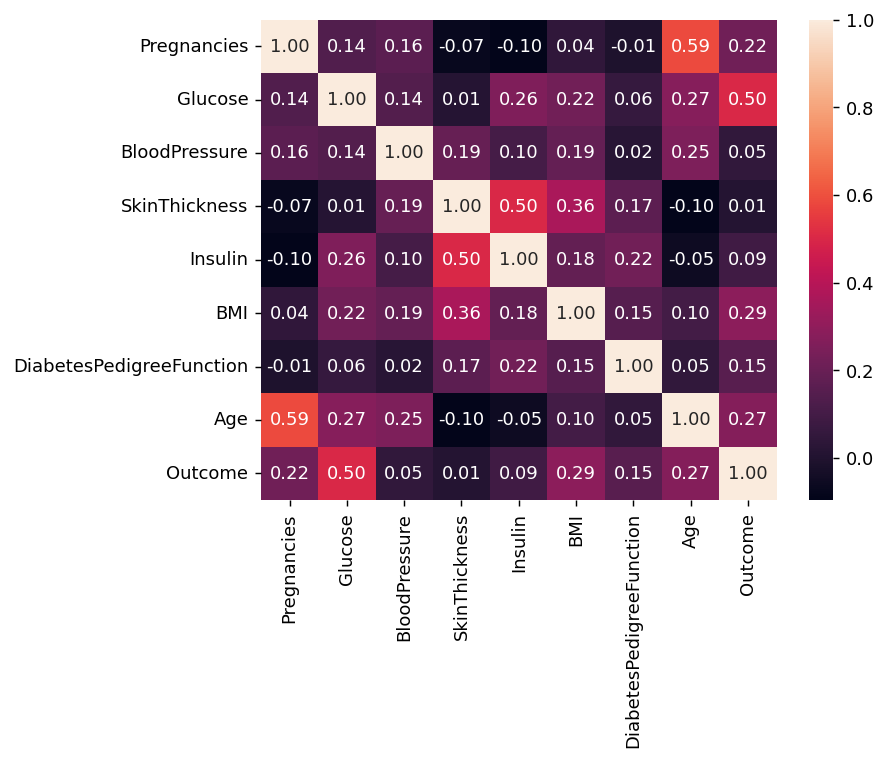

In [27]:
# Step 5 : correlation
corr = clean_data.corr()
plt.figure(dpi=130)
sns.heatmap(clean_data.corr(), annot=True, fmt='.2f')
plt.show()

In [28]:
clean_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.135805,0.164302,-0.073924,-0.096269,0.044617,-0.006730,0.586494,0.218701
Glucose,0.135805,1.000000,0.139391,0.010998,0.256627,0.223539,0.058175,0.272601,0.501732
BloodPressure,0.164302,0.139391,1.000000,0.192379,0.101850,0.190166,0.023346,0.252782,0.046318
SkinThickness,-0.073924,0.010998,0.192379,1.000000,0.499489,0.364023,0.166657,-0.095403,0.009904
Insulin,-0.096269,0.256627,0.101850,0.499489,1.000000,0.184518,0.222542,-0.053681,0.089640
BMI,0.044617,0.223539,0.190166,0.364023,0.184518,1.000000,0.148690,0.097986,0.291033
DiabetesPedigreeFunction,-0.006730,0.058175,0.023346,0.166657,0.222542,0.148690,1.000000,0.045992,0.154691
Age,0.586494,0.272601,0.252782,-0.095403,-0.053681,0.097986,0.045992,1.000000,0.271533
Outcome,0.218701,0.501732,0.046318,0.009904,0.089640,0.291033,0.154691,0.271533,1.000000


In [29]:
clean_data.Outcome.value_counts()

Outcome
0    451
1    213
Name: count, dtype: int64

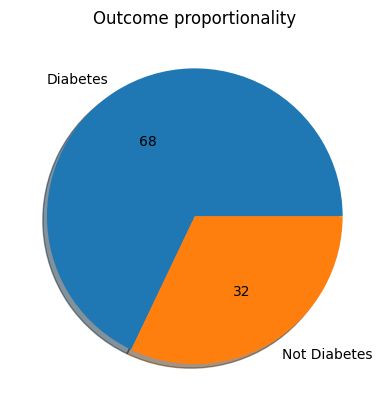

In [32]:
plt.pie(clean_data.Outcome.value_counts(), labels=['Diabetes', 'Not Diabetes'], autopct='%.f', shadow=True)
plt.title('Outcome proportionality')
plt.show()

In [53]:
# Step 6 : separate independent features and target variables
x = clean_data.drop(columns=['Outcome'])
y = clean_data.Outcome

In [54]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [55]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 664, dtype: int64

In [34]:
# Step 7 : normalization or standardization
# minmaxscaler scales the data so that each feature is in the range [0,1]
# it works well when the algorithm has different scales and the algorithm being used is
# sensitive to the scales of the features , such as k-nearest neighbours or neural networks
# rescale the data using minmaxscaler of scikit-learn

In [41]:
# intialize the min max scaler
scaler = MinMaxScaler(feature_range=(0,1))

In [42]:
# learning statistical parameters for each of the data and transforming
rescaledX = scaler.fit_transform(x)
rescaledX[:5]

array([[0.46153846, 0.67532468, 0.59016393, 0.58333333, 0.        ,
        0.48427673, 0.50091241, 0.6744186 ],
       [0.07692308, 0.26623377, 0.54098361, 0.48333333, 0.        ,
        0.26415094, 0.24908759, 0.23255814],
       [0.61538462, 0.9025974 , 0.52459016, 0.        , 0.        ,
        0.16037736, 0.5419708 , 0.25581395],
       [0.07692308, 0.29220779, 0.54098361, 0.38333333, 0.29283489,
        0.31132075, 0.08120438, 0.        ],
       [0.38461538, 0.46753247, 0.60655738, 0.        , 0.        ,
        0.2327044 , 0.11222628, 0.20930233]])

In [52]:
# Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
rescaledX = scaler.transform(x)
rescaledX[:5]

array([[ 0.67526669,  1.00210826,  0.14108424,  0.96578049, -0.80536207,
         0.23159846,  0.81544769,  1.67442358],
       [-0.84568678, -1.17330392, -0.18589634,  0.57794968, -0.80536207,
        -0.84197255, -0.30365941, -0.13016619],
       [ 1.28364808,  2.21067057, -0.29488987, -1.29656591, -0.80536207,
        -1.3480846 ,  0.9979108 , -0.03518778],
       [-0.84568678, -1.03518251, -0.18589634,  0.19011887,  0.37340819,
        -0.61192162, -1.04973082, -1.07995028],
       [ 0.371076  , -0.10286301,  0.25007777, -1.29656591, -0.80536207,
        -0.99533984, -0.9118698 , -0.2251446 ]])

In [56]:
import seaborn as sns

c:\Users\Family\DS_PRACTICE\EDA\venv\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


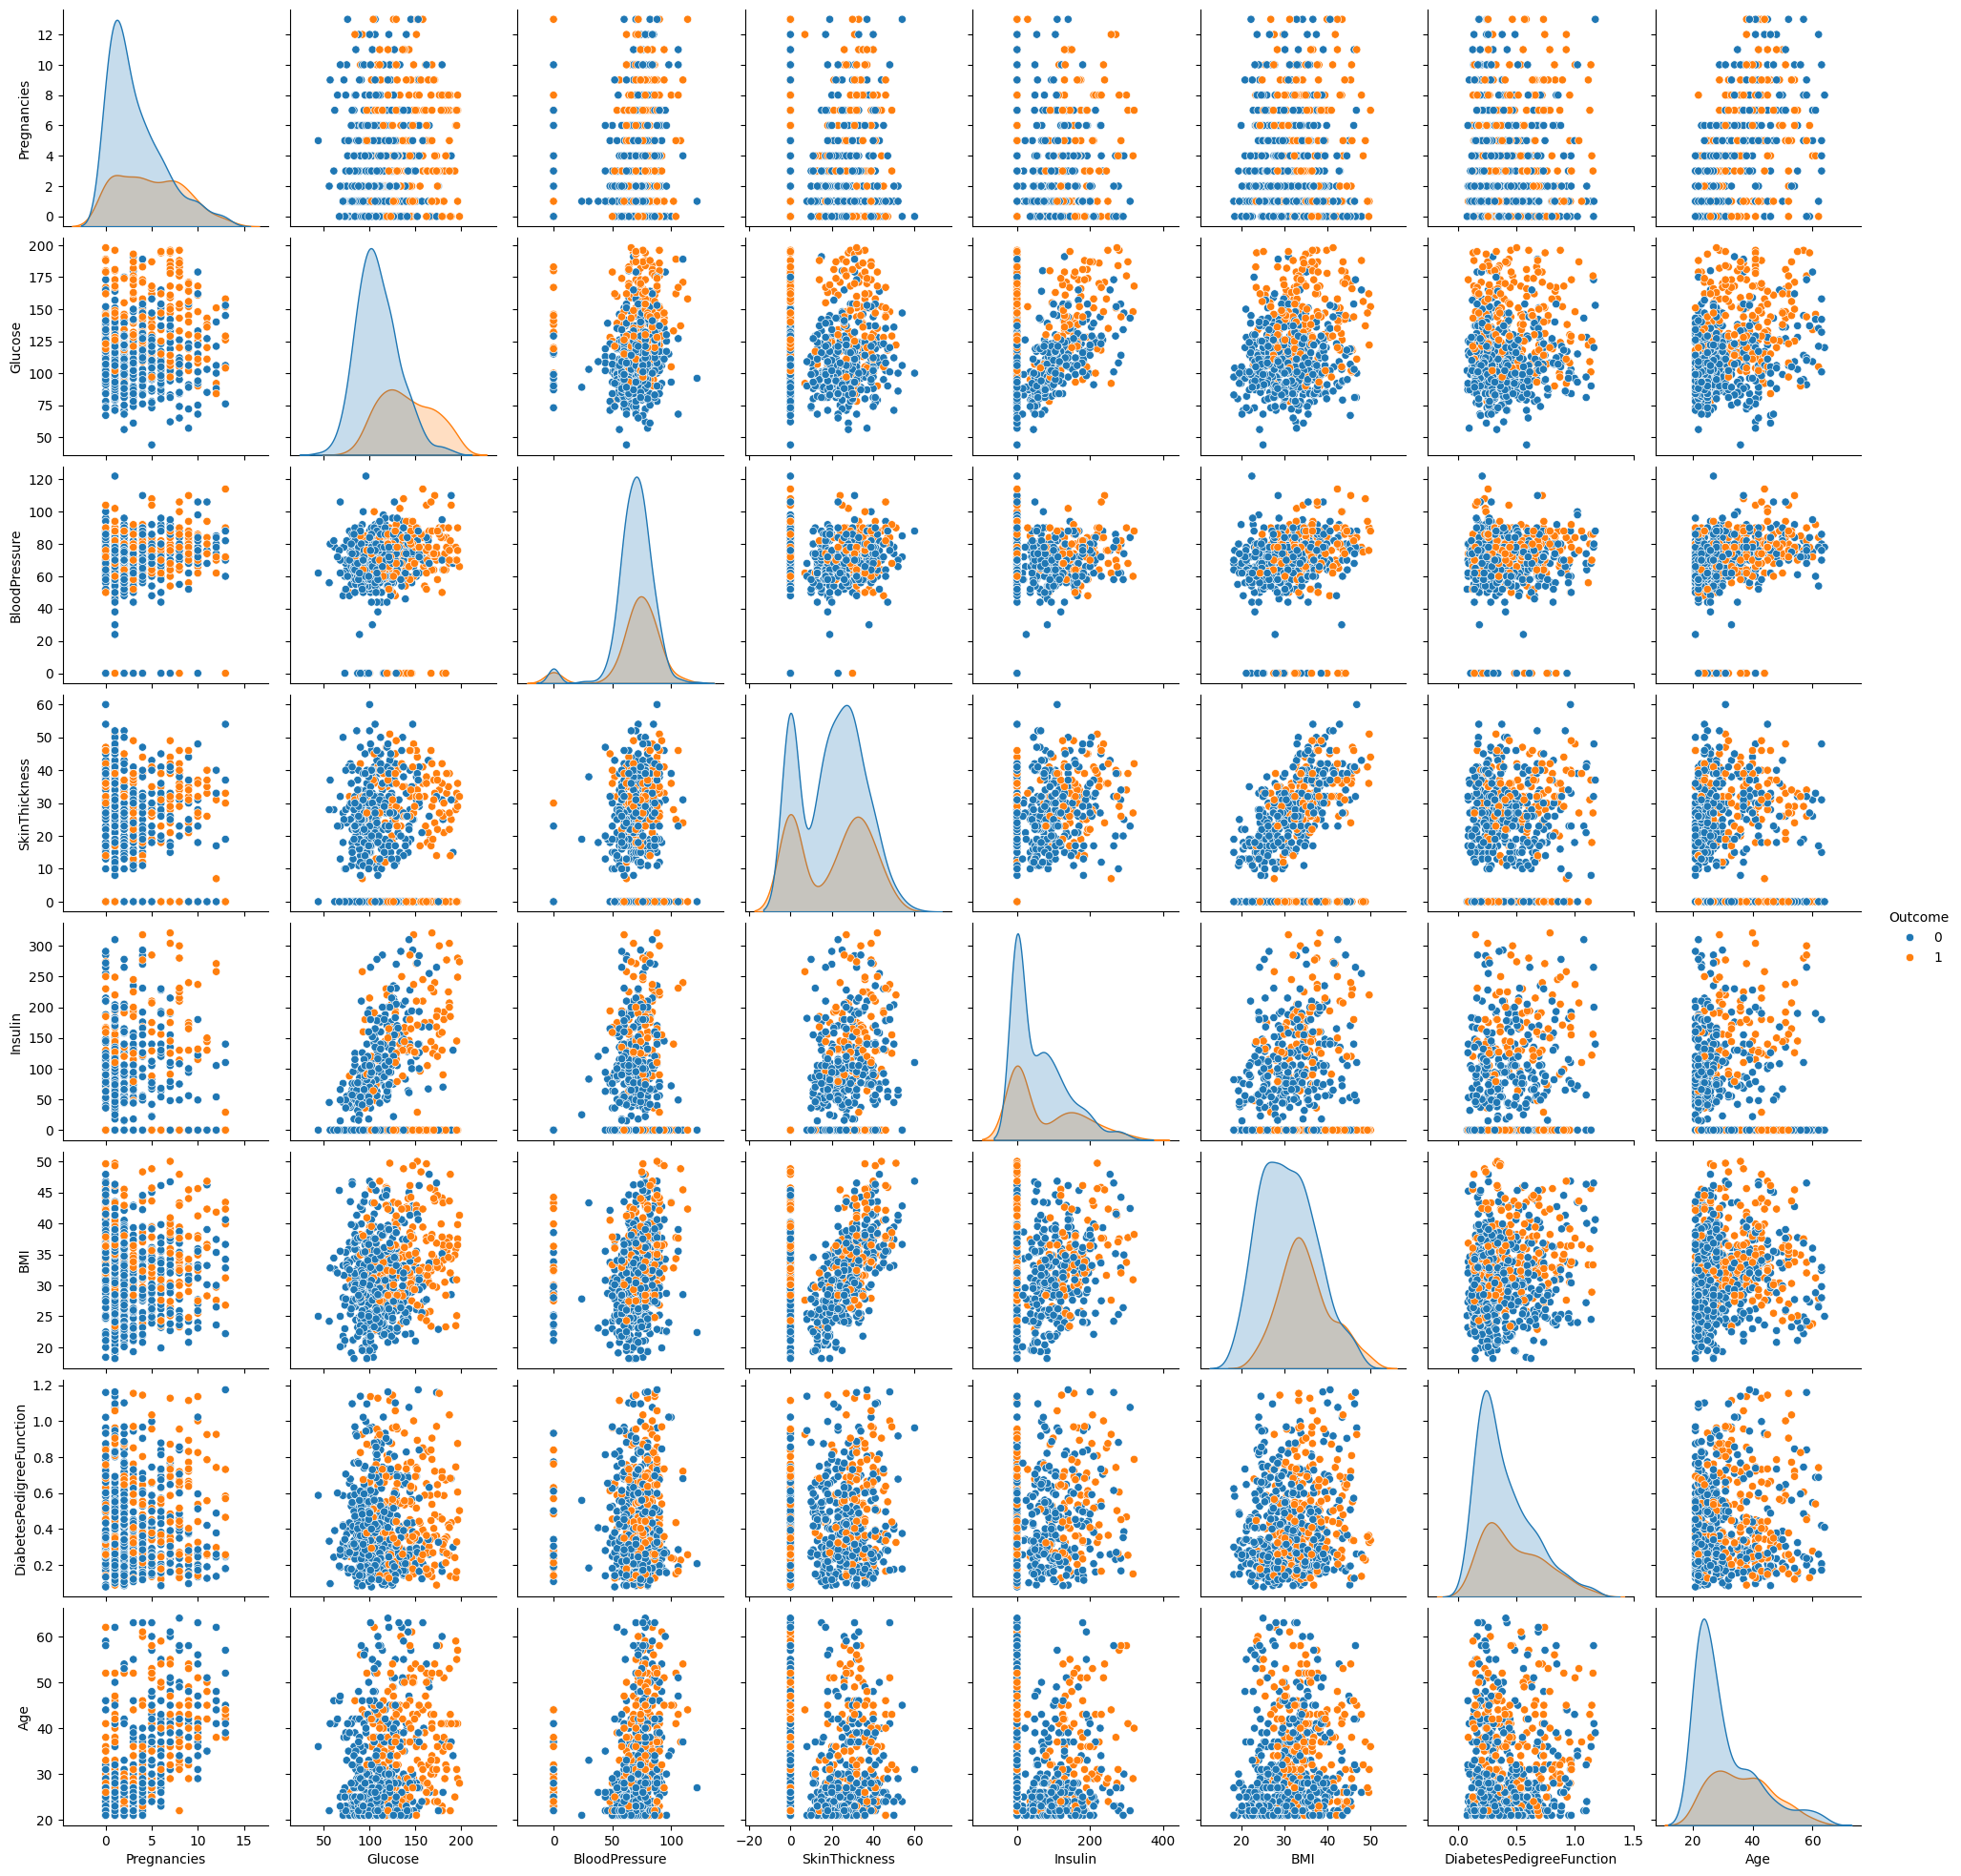

In [64]:
sns.pairplot(clean_data, hue='Outcome')

c:\Users\Family\DS_PRACTICE\EDA\venv\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


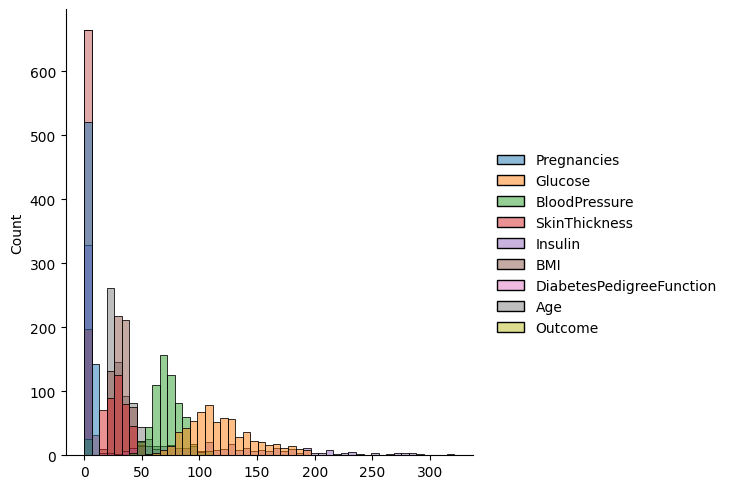

In [76]:
sns.displot(clean_data)